# Notebook to test our models

# Please run the entire notebook to test our trained models

## We have included only Customised VGG16 and Customised Xception Models

In [1]:
from tensorflow.python.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from skimage.transform import resize
import matplotlib.pyplot as plt
from random import shuffle
from numpy import array,argmax
import numpy as np
import os
import pandas as pd
import random


%matplotlib inline

## Class for extracting the data and showing some results

In [5]:
class ExtractData(object):
    # we have 10 features which are divided into below mentioned categories
    def __init__(self, directory):
        self.categories = ["n0", "n1", "n2", "n3", "n4", "n5", "n6", "n7", "n8", "n9"]
        self.label_encoder = LabelEncoder()
        self.onehot_encoder = OneHotEncoder(sparse=True)
        self.directory = directory
        self.img_shape = (224,224)
        cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
        self.df = pd.read_csv("data/monkey_labels.txt", names=cols, skiprows=1)
        
    # turn our categorical value into One-Hot encoding for classification
    def get_one_hot_vector(self):
        values = array(self.categories)  # same as above array[]
        int_encoded = self.label_encoder.fit_transform(values)  # [0,1,2,3,4,5,6,7,8,9]
        int_encoded = int_encoded.reshape(-1, 1)  # (10,1) matrix
        onehot_encoded = self.onehot_encoder.fit_transform(int_encoded)
        return onehot_encoded
    
    
    def extract_test_data(self, onehot_encoded):
        processed_data = []
        directory = self.directory
        for sub_dir in os.listdir(directory):
            for image in os.listdir(os.path.join(directory, sub_dir)):
                try:
                    img = plt.imread(os.path.join(directory, sub_dir, image))
                    resized_img = resize(img, self.img_shape)
                    y = onehot_encoded.toarray()[int(sub_dir[1])]
                    #print(y)
                    processed_data.append([img ,y])
                except Exception as ex:
                    print(ex)                
        return processed_data

    # inplace shuffling of dataset
    def shuffle_dataset(self,dataset):
        shuffle(dataset)
        return dataset
    
    def get_true_class(self,name):
        for index, row in self.df.iterrows():
            if row["Label"].strip() == name:
                return row["Latin Name"].strip()
        return None
    
    #get the result
    def plot_one_sample_result(self,test,model):
        data = random.choice(test)
        x = resize(data[0], (224, 224))
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        classes = model.predict_classes(images, batch_size=10)

        predicted = self.get_true_class('n'+str(classes[0]))
        original = self.get_true_class('n'+str(argmax(data[1])))
        plt.title("Original Name : {0} , Predicted Name : {1}".format(original,predicted))
        plt.imshow(data[0])
        print("Original Name : {0} , Predicted Name : {1}".format(original,predicted))
        
    # predict the classification using the model and data
    def get_predicted_results(self,data,model):
        x = resize(data[0], (224, 224))
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        classes = model.predict_classes(images, batch_size=10)
        predicted = self.get_true_class('n'+str(classes[0]))
        original = self.get_true_class('n'+str(argmax(data[1])))
        return original,predicted
       
    def get_xception_model(self):
        xception_model = load_model('data/xception_model.h5')
        return xception_model

    def get_vgg16_model(self):
        vgg16_model = load_model('data/vgg_model.h5')
        return vgg16_model
        
    #PLot some random images
    def plot_random_images(self,test,model):
        fig, axes = plt.subplots(2, 2,figsize=(7,7))
        fig.subplots_adjust(hspace=0.3, wspace=0.3)
        shuffle(test)
        for i, ax in enumerate(axes.flat):
            img = test[i]
            original,predicted = self.get_predicted_results(img,model)
            ax.imshow(img[0], cmap='binary')
            xlabel = "True: {0} \n Pred: {1}".format(original, predicted)
            ax.set_xlabel(xlabel)
            ax.set_xticks([])
            ax.set_yticks([])
        plt.show()
        
    # Get the image prediction given by user    
    def get_image_prediction(self,image_path,actual_class,model):
        img = plt.imread(image_path)
        y = actual_class
        data = [img,y]
        original,predicted = self.get_predicted_results(data,model)
        plt.title("Original Name : {0} , Predicted Name : {1}".format(original,predicted))
        plt.imshow(data[0])

### Extract the data 

In [6]:
testObj = ExtractData("data/validation")
one_hot = testObj.get_one_hot_vector()
extracted_test_data = testObj.extract_test_data(one_hot)
test = testObj.shuffle_dataset(extracted_test_data)

c:\python36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


### Get our trained models

In [7]:
vgg_model = testObj.get_vgg16_model()
xcep_model = testObj.get_xception_model()

-------------------------------------------------------------------------------------------------------------------------------

# Run the below code multiple times to see multiple different image classification result

### Plot some random results using trained VGG model from test data

c:\python36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


1/1 [==============================] - 0s


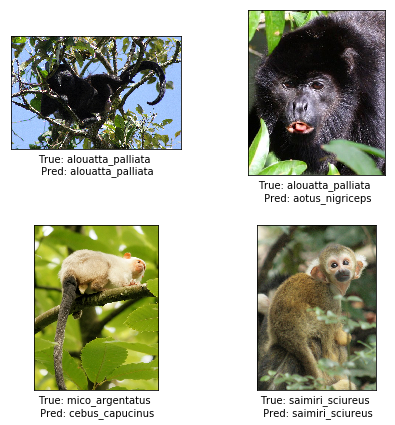

In [8]:
testObj.plot_random_images(test,vgg_model)

### Plot some random results using trained Xception model from test data

1/1 [==============================] - 0s

c:\python36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "



1/1 [==============================] - 0s


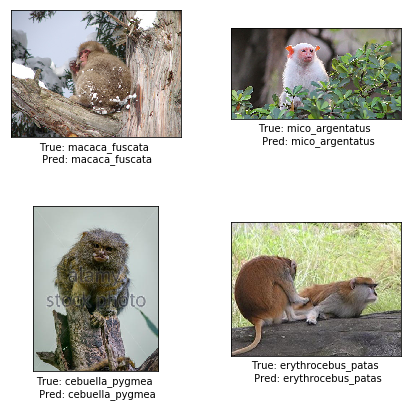

In [9]:
testObj.plot_random_images(test,vgg_model)

### Plot one random image from test data using VGG model

c:\python36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


1/1 [==============================] - 0s
Original Name : cebus_capucinus , Predicted Name : cebus_capucinus


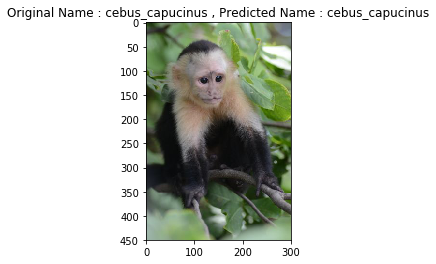

In [10]:
testObj.plot_one_sample_result(test,xcep_model)

### Plot one random image from test data using Xception model

1/1 [==============================] - 0s

c:\python36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "



Original Name : trachypithecus_johnii , Predicted Name : trachypithecus_johnii


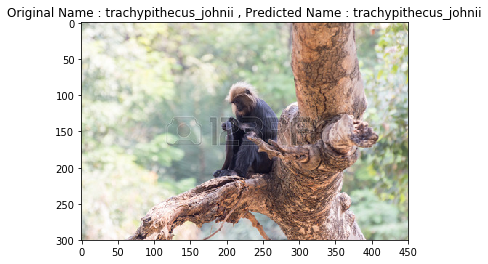

In [11]:
testObj.plot_one_sample_result(test,xcep_model)

## Predict your own image 
### Steps to predict the classification
1. Give your image path
2. Give your image class
3. Then run 'get_image_prediction' method to get the predictions 

In [12]:
path = 'data/example.jpg'
class_name = 6 # give the folder number
testObj = ExtractData("data/validation")

#### VGG16 model Prediction

c:\python36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


1/1 [==============================] - 0s


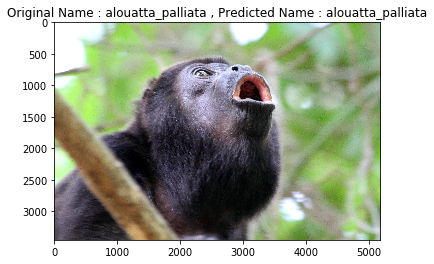

In [13]:
# VGG 16 image prediction
vgg_model = testObj.get_vgg16_model()
testObj.get_image_prediction(path,class_name,vgg_model)

#### Xception model prediction

c:\python36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


1/1 [==============================] - 0s


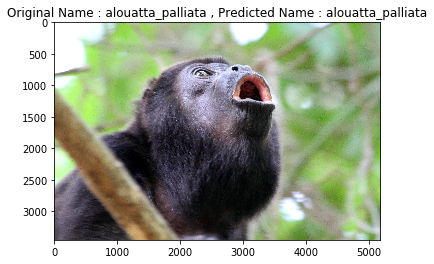

In [14]:
# xception_model image prediction
xception_model = testObj.get_xception_model()
testObj.get_image_prediction(path,class_name,xception_model)